In [1]:
import sys
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

# hacky way to import modules from ../src
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src")

from counting135 import Counting135, CountingNet135

## Counting135 network architecture

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = CountingNet135().to(device)
net

CountingNet135(
  (cnn): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU(inplace=True)
    (5): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU(inplace=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(inplace=True)
    (15):

This network is very similar to the Counting one, the difference is that there is no final BatchNorm1d layer, and tere are 135 out_features in last Linear layer.

### Training

The main problem, that I encountered for this 135-output network was implementing  the loss function.

I wanted to map output of this network, to 

Train loss = 0.0015072366197903951
Test loss = 0.005294382214546204
Train accuracy = 0.8577777777777778
Test accuracy = 0.573


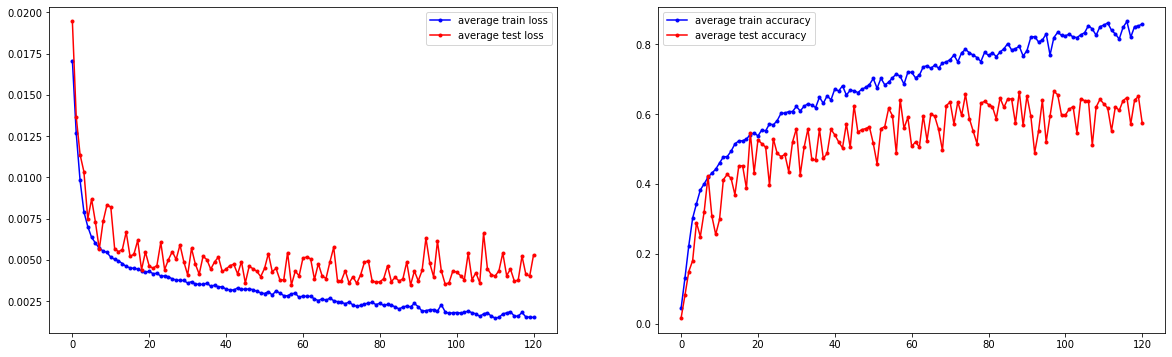

In [3]:
problem = Counting135(net, dataset_path="../data/extracted", device=device)

problem.trainer.train(420, early_stop=10, verbose=False)

print("Train loss =", problem.trainer.avg_train_losses[-1])
print("Test loss =", problem.trainer.avg_test_losses[-1])
print("Train accuracy =", problem.trainer.avg_train_accuracies[-1])
print("Test accuracy =", problem.trainer.avg_test_accuracies[-1])

problem.trainer.plot()

In [4]:
avg_loss, avg_accuracy = problem.compute_loss()
print("Mapped train loss = {:.4f}, accuracy = {:.2f}%".format( 
    avg_loss, avg_accuracy * 100
))

Mapped train loss = 1.7244, accuracy = 57.00%


Epoch:  0
    Train set: Average loss: 0.5772, Accuracy: 85.77%
    Test set: Average loss: 1.4976, Accuracy: 57.40%
Epoch:  1
    Train set: Average loss: 0.5597, Accuracy: 85.17%
    Test set: Average loss: 1.4361, Accuracy: 62.70%
Epoch:  2
    Train set: Average loss: 0.5360, Accuracy: 85.70%
    Test set: Average loss: 1.2186, Accuracy: 65.20%
Train loss = 0.5359983410305447
Test loss = 1.2186104736328125
Train accuracy = 0.857
Test accuracy = 0.652


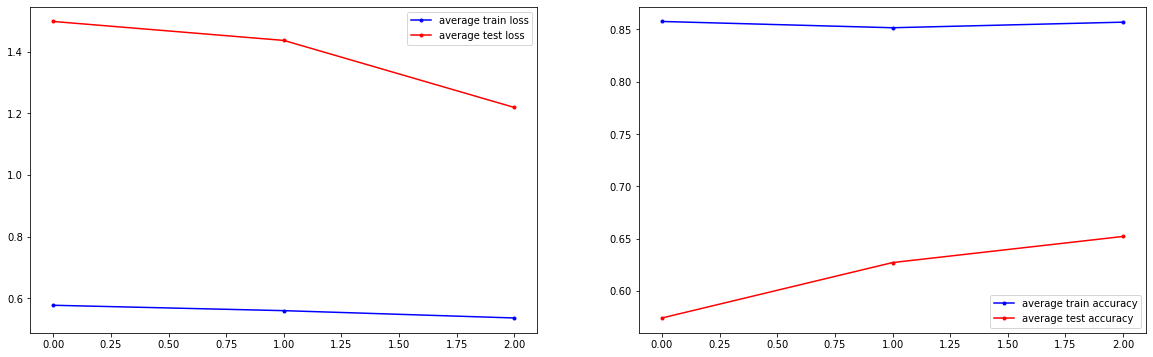

In [5]:
problem = Counting135(net, dataset_path="../data/extracted", device=device, fast_loss=False)

problem.trainer.train(3, verbose=True)

print("Train loss =", problem.trainer.avg_train_losses[-1])
print("Test loss =", problem.trainer.avg_test_losses[-1])
print("Train accuracy =", problem.trainer.avg_train_accuracies[-1])
print("Test accuracy =", problem.trainer.avg_test_accuracies[-1])

problem.trainer.plot()

In [6]:
avg_loss, avg_accuracy = problem.compute_loss()
print("Mapped train loss = {:.4f}, accuracy = {:.2f}%".format( 
    avg_loss, avg_accuracy * 100
))

Mapped train loss = 1.2186, accuracy = 65.10%
